<a href="https://colab.research.google.com/github/rohitchav/Mini_Project/blob/main/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
Heart_Data=pd.read_csv('https://raw.githubusercontent.com/rohitchav/Mini_Project/main/heart.csv')

In [ ]:
Count_class=Heart_Data['target'].value_counts()

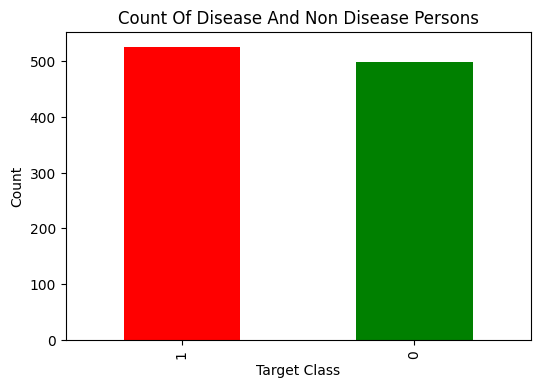

In [ ]:
plt.figure(figsize=(6,4))
Count_class.plot(kind='bar',color=['Red','Green'])
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Count Of Disease And Non Disease Persons')
plt.show()

In [ ]:
Heart_Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
Heart_Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
Heart_Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Defining Variables
y=Heart_Data['target'] #Dependent Varaible
X=Heart_Data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] #Independent Varaibles

In [ ]:
#For Spliting Data From The Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2529)

In [ ]:
#Initilizing The Model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)



In [ ]:
#Training Data On The Given Model
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_prediction=model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,model_prediction)
class_rep = classification_report(y_test, model_prediction)

Text(0.5, 1.0, 'Confusion Matrix')

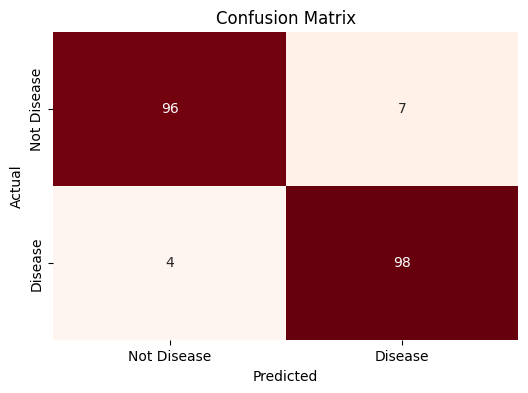

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix , annot=True ,fmt='d', cmap='Reds' ,cbar=False ,xticklabels=['Not Disease','Disease'],yticklabels=['Not Disease','Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Accuracy=accuracy_score(y_test,model_prediction)
print(f"Accuracy Of The Model:{round(Accuracy*100)}%")

Accuracy Of The Model:95%


In [ ]:
#For Testing Model By Giving User Input
print("\nEnter details for a new data point:")
age = float(input("Age: "))
sex = float(input("Sex (0 for female, 1 for male): "))
cp = float(input("Chest Pain Type: "))
trestbps = float(input("Resting Blood Pressure: "))
chol = float(input("Serum Cholesterol: "))
fbs = float(input("Fasting Blood Sugar: "))
restecg = float(input("Resting Electrocardiographic Results: "))
thalach = float(input("Maximum Heart Rate Achieved: "))
exang = float(input("Exercise Induced Angina (0 for no, 1 for yes): "))
oldpeak = float(input("ST Depression Induced by Exercise: "))
slope = float(input("Slope of the Peak Exercise ST Segment: "))
ca = float(input("Number of Major Vessels Colored by Fluoroscopy: "))
thal = float(input("Thalassemia: "))

User_Data=[[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]


Enter details for a new data point:


In [ ]:
numpy_array=np.asarray(User_Data)

input_reshaped=numpy_array.reshape(1,-1)

prediction=model.predict(input_reshaped)

In [ ]:
if(prediction[0]==0):
  print("Patient Have Does Not Heart Disease")
else:
  print("Patient Have Heart Disease")

Patient Have Heart Disease
